<a href="https://colab.research.google.com/github/MMoltira/AIprototype2022/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install azure-data-tables

     |████████████████████████████████| 108 kB 5.4 MB/s 
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 178 kB 18.3 MB/s 
     |████████████████████████████████| 41 kB 287 kB/s 


#Azure Table (Clound DB)

1. create DB on Azure Portal
2. insert data
3. query data

In [ ]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [ ]:
#Creating the Table service client from a connection string
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=pondaiprototype;AccountKey=FxgRRzZV8UHdlKIHod1v6nEek+HwmB0u/idvPBBOCi2kzFG9i2GYHfoZECi3ZIGAgkuZs3LkhqaQ/Mf0Llyohg==;EndpointSuffix=core.windows.net')

#insert data

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [ ]:
#create entity
task = TableEntity()
task[u'PartitionKey'] = u'part5'
task[u'RowKey'] = u'011'
task[u'name'] = u'Moltira'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 3, 3, 2, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T03%3A03%3A03.5823339Z\'"',
 'version': '2019-02-02'}

In [ ]:
# Replace the entity created earlier
task = {u'PartitionKey': u'part6', u'RowKey': u'012',
        u'name': u'python4', u'room': 'online',u'age':30}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 3, 7, 1, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T03%3A07%3A02.2048532Z\'"',
 'version': '2019-02-02'}

#Query

##query

In [ ]:
table_client=table_service.get_table_client(table_name="testdb")

In [ ]:
task = table_client.get_entity('part5', '011')
print(task)

{'PartitionKey': 'part5', 'RowKey': '011', 'name': 'Moltira', 'age': 30}


In [ ]:
for i in range(10):
    task = {u'PartitionKey': u'partQ55', u'RowKey': f'00{i+10}',
        u'name': u'Moltira', u'room': u'online',u'age': i }
    table_client.create_entity(entity=task)


In [ ]:
tasks = table_client.query_entities(query_filter="age gt 5")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7f52b7c0aa50>


In [ ]:
for t in tasks:
  print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'description': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'online', 'age': 14}
{'PartitionKey': 'part1', 'RowKey': '003', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '004', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part4', 'RowKey': '004', 'description': 'start4', 'age': 22}
{'PartitionKey': 'part5', 'RowKey': '011', 'name': 'Moltira', 'age': 30}
{'PartitionKey': 'part6', 'RowKey': '012', 'name': 'python4', 'room': 'online', 'age': 30}
{'PartitionKey': 'partQ1', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age': 6}
{'PartitionKey': 'partQ1', 'RowKey': '0017', 'name': 'python', 'room': 'online', 'age': 7}
{'PartitionKey': 'partQ1', 'RowKey': '0018', 'name': 'python', 'room': 'online', 'age': 8}
{'PartitionKey': 'partQ1', 'RowKey': '0019', 'name': 'python', 'room': 'online', 'age': 9}
{'PartitionKey': 'partQ4', 'RowKey': '0016', 'name': 'python', 'room': 'online', 'age'

##Cloud AI

In [ ]:
pip install azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

credentials = CognitiveServicesCredentials('1e39933e32bc4ba2900a93536bb26658')
client = ComputerVisionClient(
    endpoint="https://Southeast Asia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


credentials = CognitiveServicesCredentials('1e39933e32bc4ba2900a93536bb26658')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)


In [ ]:
url = "https://pondaiprototype.blob.core.windows.net/pics/1102.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 19, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7f52ae03ef50>}


In [ ]:
import cv2

In [ ]:
from matplotlib import pyplot as plt

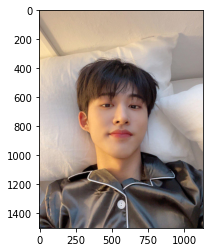

In [ ]:
img = cv2.imread('/content/251086735_1049348102557301_8203382954665580488_n (1).jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img2=cv2.rectangle(img, (tag.face_rectangle.left, tag.face_rectangle.top),
                   (tag.face_rectangle.left+tag.face_rectangle.width, tag.face_rectangle.top+tag.face_rectangle.height),(0,0,225),5)

19
Gender.male


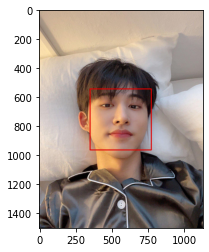

In [ ]:
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)